In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('shoe.xlsx')
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


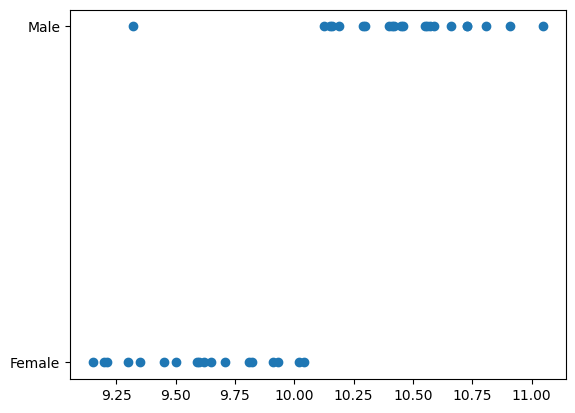

In [3]:
plt.scatter(df['size(cm)'],df['class(y)'])

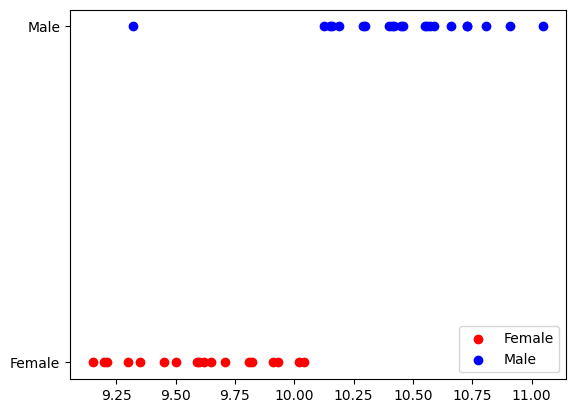

In [4]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')

plt.legend()

# Preprocessing

# Encoding

In [5]:
df

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male
5,9.150,Female
6,9.450,Female
7,10.570,Male
8,9.710,Female
9,9.650,Female


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [9]:
df

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1
5,9.150,0
6,9.450,0
7,10.570,1
8,9.710,0
9,9.650,0


In [10]:
x = df[['size(cm)']]

In [11]:
y = df[['class(y)']]

In [12]:
x

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050
5,9.150
6,9.450
7,10.570
8,9.710
9,9.650


In [13]:
y

,class(y)
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,0


In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=55)

In [15]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [17]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
m = reg.coef_
m

array([[2.10745564]])

In [19]:
c = reg.intercept_
c

array([-20.81422921])

In [99]:
reg.predict_proba(xtest) #Probability

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [20]:
reg.predict(xtest)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [21]:
ytest.head()

,class(y)
22,0
3,0
2,1
38,0
6,0


In [22]:
Log_score = reg.score(xtest,ytest)

In [23]:
Log_score

0.9166666666666666

In [24]:
log_mae = mean_absolute_error(ytest,reg.predict(xtest))

In [25]:
log_mae

0.08333333333333333

In [26]:
log_mse = mean_squared_error(ytest,reg.predict(xtest))

In [28]:
log_mse

0.08333333333333333

# Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [32]:
dtc_pred = dtc.predict(xtest)
dtc_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [33]:
dtc_score = dtc.score(xtest,ytest)
dtc_score

1.0

In [36]:
dtc_mae = mean_absolute_error(ytest,dtc_pred)
dtc_mae

0.0

In [48]:
dtc_mse = mean_squared_error(ytest,dtc_pred)
dtc_mse

0.0

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [41]:
knn_score = knn.score(xtest,ytest)
knn_score

1.0

In [42]:
knn_mae = mean_absolute_error(ytest,knn_pred)
knn_mae

0.0

In [43]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

0.0

# Dataframe

In [53]:
data = {'Model': ['Logistic Regression','Decision Tree','KNN'],
        'MAE':[log_mae,dtc_mae,knn_mae],
        'MSE':[log_mse,dtc_mse,knn_mse],
       'Accuracy':[Log_score,dtc_score,knn_score]}
df1 = pd.DataFrame(data)
df1

,Model,MAE,MSE,Accuracy
0,Logistic Regression,0.083333,0.083333,0.916667
1,Decision Tree,0.000000,0.000000,1.000000
2,KNN,0.000000,0.000000,1.000000


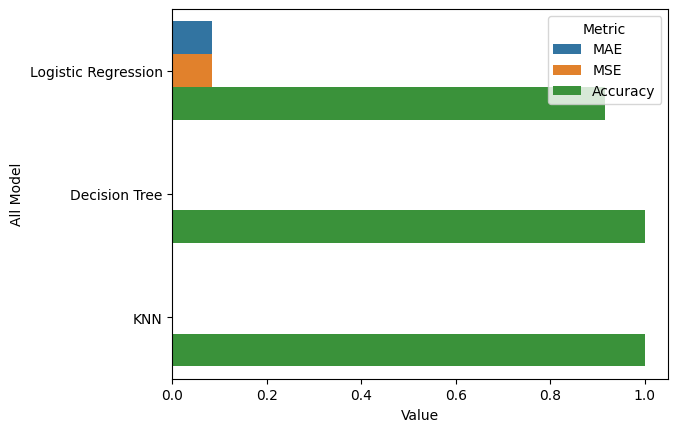

In [57]:
import seaborn as sns
df_plot = df1.melt('Model', var_name='Metric', value_name='Value')
sns.barplot(x='Value',y='Model', hue='Metric', data=df_plot)
plt.xlabel('Value')
plt.ylabel('All Model')
plt.show()